In [1]:
import pandas as pd
import requests
import geopandas as gpd
from shapely.geometry import shape
import contextily as ctx
import matplotlib.pyplot as plt


Bad key text.latex.unicode in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplo

<div class="alert"  
     style="font-size:25px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 5px outset black; background-color: black;border-radius: 25px;">                
        <b>1. </b> <a id='explore'>CAPS en Partidos de AMBA</a>
</div>

## Shapefile de la página de Estadísticas de GBA con los polígonos de todos los partidos.

In [4]:
partidos = gpd.read_file(r"shapefile/Partidos.shp", encoding="utf-8")

In [5]:
gdf = partidos.to_crs(epsg=3857)
pd.set_option('display.max_rows', 20)
gdf.geometry

0      POLYGON ((-6554604.042 -4113096.101, -6554621....
1      POLYGON ((-6498214.956 -4117383.046, -6498134....
2      POLYGON ((-6709517.851 -3930344.729, -6709389....
3      POLYGON ((-6557000.593 -4023028.048, -6556894....
4      POLYGON ((-6712465.899 -4028609.774, -6712434....
                             ...                        
138    POLYGON ((-6564032.185 -4023538.280, -6564070....
139    POLYGON ((-6529638.555 -4078879.130, -6529184....
140    POLYGON ((-6881602.155 -4080814.099, -6881846....
141    POLYGON ((-6841749.822 -4207422.989, -6842868....
142    POLYGON ((-6325161.393 -4442573.532, -6325680....
Name: geometry, Length: 143, dtype: geometry

## Importo el excel de información de CAPS en AMBA

In [7]:
info = pd.read_excel(r'data/Muncipios y CAPS jul2020.xlsx')
info.Municipio.unique()

array(['LANUS', 'MORON', 'QUILMES', 'SAN MIGUEL', 'ALMIRANTE BROWN',
       'EZEIZA', 'TRES DE FEBRERO', 'BRANDSEN', 'LOMAS DE ZAMORA',
       'MARCOS PAZ', 'PILAR', 'HURLINGHAM', 'MORENO', 'SAN MARTÍN',
       'General Rodríguez', 'VICENTE LOPEZ', 'SAN ISIDRO', 'TIGRE',
       'ESTEBAN ECHEVERRIA'], dtype=object)

In [8]:
info['Municipio'] = info.Municipio.apply(lambda x: x.title())

In [9]:
d = {'Lanus':'Lanús', 'Moron': 'Morón','Vicente Lopez': 'Vicente López', 'Tres De Febrero': 'Tres de Febrero','Esteban Echeverria':'Esteban Echeverría', 'Lomas De Zamora': 'Lomas de Zamora', 'San Martín':'General San Martín' }
info['Municipio']=info.Municipio.replace(d)

In [10]:
info.head(2)

,Municipio,CAPS,Estado
0,Lanús,1° DE MAYO,FINALIZADO
1,Lanús,JUAN GIARDINO,FINALIZADO


In [11]:
len(info.Municipio.unique())

19

## Filtro solamente los que están en estado finalizado

In [12]:
finalizado = info[info.Estado == 'FINALIZADO']

In [13]:
info

,Municipio,CAPS,Estado
0,Lanús,1° DE MAYO,FINALIZADO
1,Lanús,JUAN GIARDINO,FINALIZADO
2,Lanús,LOS CEIBOS,FINALIZADO
3,Lanús,26 DE ABRIL,FINALIZADO
4,Lanús,VILLA PORA,FINALIZADO
...,...,...,...
342,Esteban Echeverría,LA MORITA,EN PROYECTO
343,Esteban Echeverría,LA CAMPANA,EN PROYECTO
344,Esteban Echeverría,LUIS GUILLÓN,EN PROYECTO
345,Esteban Echeverría,EL GAUCHO,EN PROYECTO


In [14]:
cantidad = pd.DataFrame(finalizado.Municipio.value_counts())
cantidad

,Municipio
Quilmes,28
Almirante Brown,25
Lanús,16
San Miguel,15
Pilar,15
Lomas de Zamora,14
Moreno,14
Tres de Febrero,13
Ezeiza,13
Brandsen,10


In [15]:
cantidad = cantidad.reset_index()
cantidad = cantidad.rename(columns={"index": "nam", 'Municipio':'Cantidad'})
gdf = gdf.merge(cantidad, how='outer',on='nam')

In [16]:
nombres_partidos = ['Lanús', 'Morón', 'Quilmes', 'San Miguel', 'Almirante Brown',
       'Ezeiza', 'Tres de Febrero', 'Brandsen', 'Lomas de Zamora',
       'Marcos Paz', 'Pilar', 'Hurlingham', 'Moreno', 'General San Martín',
       'General Rodríguez', 'Vicente López', 'San Isidro', 'Tigre',
       'Esteban Echeverría']
mask = gdf.nam.isin(nombres_partidos)
gdf_clean = gdf[mask]

In [17]:
gdf_clean['Cantidad']

0       NaN
11     25.0
21     13.0
22     16.0
23     14.0
28      7.0
45     15.0
58     14.0
66     13.0
82      9.0
85     15.0
86      9.0
87      NaN
92      1.0
96      NaN
102    28.0
104    10.0
109     1.0
139     NaN
Name: Cantidad, dtype: float64

In [18]:
gdf_clean

,gid,cca,cde,fna,gna,nam,sag,ara3,arl,geometry,Cantidad
0,39,046,06364,Partido de General Rodríguez,Partido,General Rodríguez,ARBA,3.654019e+08,360.14,"POLYGON ((-6554604.042 -4113096.101, -6554621....",NaN
11,9,003,06028,Partido de Almirante Brown,Partido,Almirante Brown,ARBA,1.294321e+08,129.33,"POLYGON ((-6492543.959 -4133084.928, -6492344....",25.0
21,48,130,06270,Partido de Ezeiza,Partido,Ezeiza,ARBA,2.373863e+08,236.81,"POLYGON ((-6513330.216 -4150548.622, -6513325....",13.0
22,22,025,06434,Partido de Lanús,Partido,Lanús,ARBA,5.004042e+07,48.35,"POLYGON ((-6502498.589 -4117665.345, -6502425....",16.0
23,15,063,06490,Partido de Lomas de Zamora,Partido,Lomas de Zamora,ARBA,8.870368e+07,87.30,"POLYGON ((-6506323.002 -4121626.597, -6504694....",14.0
28,100,068,06525,Partido de Marcos Paz,Partido,Marcos Paz,ARBA,4.238224e+08,455.12,"POLYGON ((-6552676.661 -4120934.561, -6552575....",7.0
45,20,084,06638,Partido de Pilar,Partido,Pilar,ARBA,3.848447e+08,383.01,"POLYGON ((-6559120.999 -4081982.915, -6559120....",15.0
58,8,074,06560,Partido de Moreno,Partido,Moreno,ARBA,1.860508e+08,186.13,"POLYGON ((-6543018.988 -4103964.925, -6542599....",14.0
66,60,117,06840,Partido de Tres de Febrero,Partido,Tres de Febrero,ARBA,4.579255e+07,43.04,"POLYGON ((-6525658.785 -4102311.657, -6525642....",13.0
82,30,110,06861,Partido de Vicente López,Partido,Vicente López,ARBA,3.545112e+07,33.77,"POLYGON ((-6513286.783 -4105511.693, -6513394....",9.0


C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


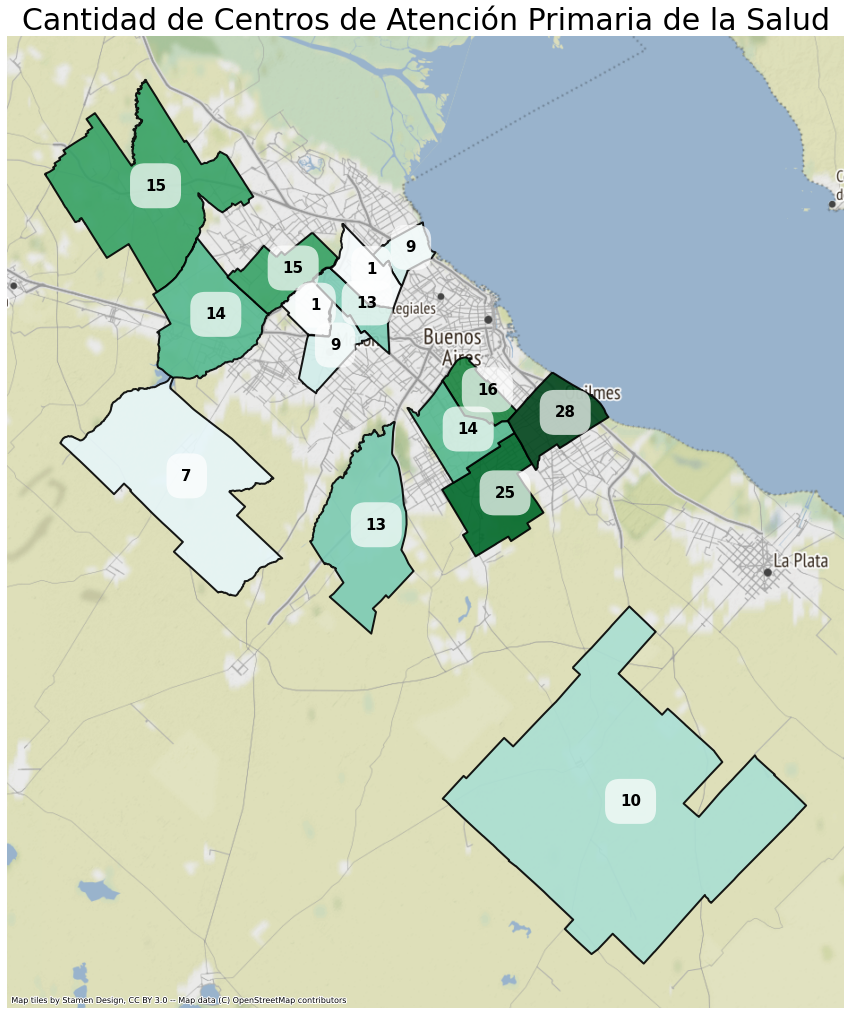

In [20]:
ax = gdf_clean.plot(column='Cantidad',figsize=(15, 20),alpha=0.9, cmap = plt.get_cmap('BuGn'),edgecolor="black",linewidth=2,categorical=True)
ctx.add_basemap(ax,source=ctx.providers.Stamen.Terrain)
plt.title('Cantidad de Centros de Atención Primaria de la Salud',fontsize=30);
gdf_clean.dropna().apply(lambda x: ax.annotate(s=int(x.Cantidad), xy=x.geometry.centroid.coords[0],size=15,weight='bold', ha='left',bbox={'boxstyle':"round",'facecolor': 'white', 'alpha':0.7, 'pad': 1, 'edgecolor':'none'}),axis=1);
ax.set_axis_off()
# plt.savefig('MapaCAPS.png')